In [1]:
import matplotlib.pyplot as plt
import numpy as np

DIMS = (32, 32)
NF = 2 # number of features / parameters

# random_result = np.random.randn(*DIMS)

# plt.imshow(random_result)
# plt.tight_layout()
# plt.show()

In [2]:
from functions import rastrigin

image = np.zeros(DIMS, dtype=float)

x = np.zeros(2)

i_space = np.linspace(-5.12, 5.12, DIMS[0])
j_space = np.linspace(-5.12, 5.12, DIMS[1])

for i, xi in enumerate(i_space):
    for j, xj in enumerate(j_space):
        x[0], x[1] = xi, xj
        image[i][j] = rastrigin(x)


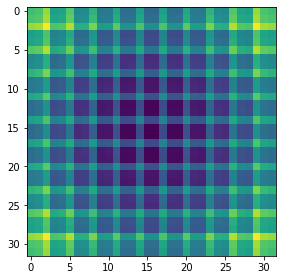

In [3]:
plt.imshow(image)
plt.tight_layout()
plt.show()

In [4]:
def sample_uniform(low, high, shape):
    return np.random.uniform(low, high, shape)


def evaluate(population, f=rastrigin):
    return np.apply_along_axis(f, 2, pop)


def plot_fitness(fitness):
    plt.imshow(fitness)
    plt.tight_layout()
    plt.show()

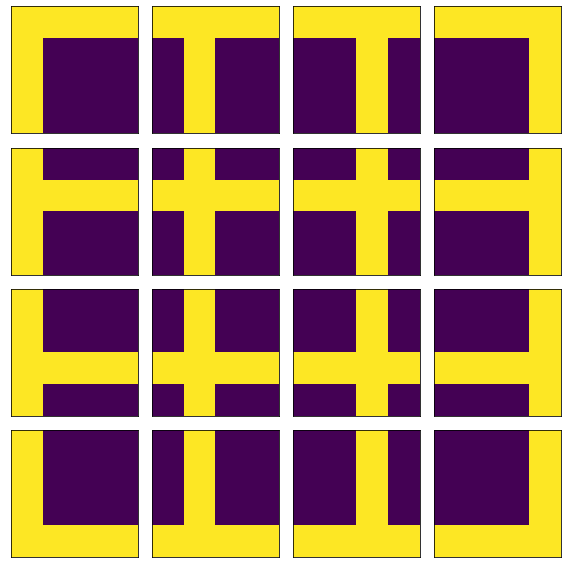

In [5]:
from operators import nhood_linear

def draw_nhood(image, nhood_idx):
    for idx in nhood_idx:
        x, y = idx
        image[x][y] = 1.0


fig, ax = plt.subplots(4, 4, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})

for i in range(4):
    for j in range(4):
        image = np.zeros((4, 4))
        nhood_idx = nhood_linear(i, j, (4, 4), n=9)
        draw_nhood(image, nhood_idx)
        ax[i][j].imshow(image)
fig.tight_layout()

(32, 32)


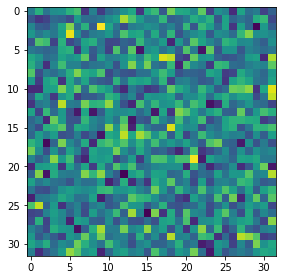

In [6]:
pop = sample_uniform(-5.12, 5.12, DIMS + (NF,))
fit = evaluate(pop)
print(fit.shape)
plot_fitness(fit)

In [7]:
import time

from operators import mutate_gaussian
from operators import nhood_get, nhood_set
from operators import recomb_singlepoint
from operators import replace_always
from operators import select_linear

# n_steps = 1
# x_range = range(1)
# y_range = range(1)

n_steps = 25
x_range = range(DIMS[0])
y_range = range(DIMS[1])

pb_mutate = 0.25

metrics = {
    "min": np.zeros(n_steps),
    "max": np.zeros(n_steps)
}

history = np.zeros((n_steps,) + DIMS)

for step in range(n_steps):
    start = time.time()
    pop_new = np.zeros_like(pop)
    
    for x in x_range:
        for y in y_range:
            nhood_idx        = list(nhood_linear(x, y, DIMS))
            nhood, nhood_fit = nhood_get(pop, fit, nhood_idx)

            a = select_linear(nhood, nhood_fit)
            b = recomb_singlepoint(nhood[0], nhood[a])
            p = np.random.randn()
            if p < pb_mutate: b = mutate_gaussian(b)
            pop_new[x][y] = b

    pop[:] = pop_new
    fit = evaluate(pop)
    history[step] = fit
    metrics["min"][step] = np.min(fit)
    metrics["max"][step] = np.max(fit)
    end = time.time()
    print("step ({:3}) - {:.4f}s elapsed".format(step + 1, end - start))


step (  1) - 0.1468s elapsed
step (  2) - 0.1336s elapsed
step (  3) - 0.1155s elapsed
step (  4) - 0.0979s elapsed
step (  5) - 0.0966s elapsed
step (  6) - 0.0979s elapsed
step (  7) - 0.0968s elapsed
step (  8) - 0.0961s elapsed
step (  9) - 0.1136s elapsed
step ( 10) - 0.1523s elapsed
step ( 11) - 0.1598s elapsed
step ( 12) - 0.1247s elapsed
step ( 13) - 0.0982s elapsed
step ( 14) - 0.0960s elapsed
step ( 15) - 0.0956s elapsed
step ( 16) - 0.0971s elapsed
step ( 17) - 0.1034s elapsed
step ( 18) - 0.1369s elapsed
step ( 19) - 0.1708s elapsed
step ( 20) - 0.1430s elapsed
step ( 21) - 0.1010s elapsed
step ( 22) - 0.0975s elapsed
step ( 23) - 0.1190s elapsed
step ( 24) - 0.1447s elapsed
step ( 25) - 0.1651s elapsed


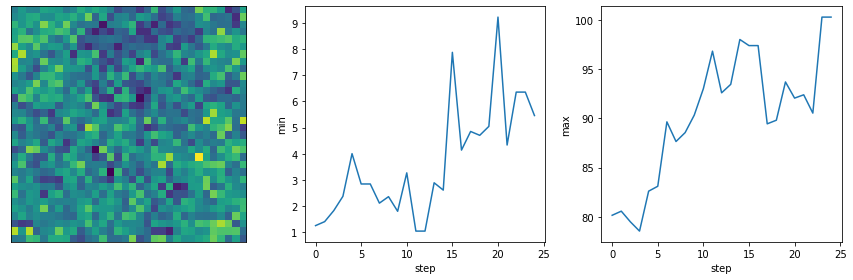

In [8]:
step_range = range(n_steps)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].imshow(fit)
ax[1].set_xlabel("step")
ax[1].set_ylabel("min")
ax[1].plot(step_range, metrics["min"])
ax[2].set_xlabel("step")
ax[2].set_ylabel("max")
ax[2].plot(step_range, metrics["max"])
fig.tight_layout()

In [9]:
from PIL import Image

frames = [Image.fromarray(frame) for frame in history]
frames[0].save("array.gif", save_all=True, append_images=frames[1:], duration=500, loop=0)